In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/clavandera/challengeTelecomX.2/refs/heads/main/df_final.csv'
df = pd.read_csv(
    url,
    sep=",",
    encoding="utf-8",
    on_bad_lines="skip"
)

# Ver las primeras filas
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


--Eliminaciòn de columna irrelevante

In [ ]:
# Elimino la columna que no necesito
df.drop(columns=["customerID", "Partner"], inplace=True)

# Verificar el cambio
df.head()

,Churn,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0,Male,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,1,Male,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,1,Male,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,1,Female,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


--Transformaciòn de datos:
Transforme las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.

In [ ]:
df

,Churn,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0,Male,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,1,Male,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,1,Male,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,1,Female,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,1,Male,0,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,0,Male,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,0,Male,0,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificar el resultado
df_encoded.head()

,Churn,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Charges.Total,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,9,1,0,0,1,0,1,...,593.30,2.16,False,False,False,True,False,False,False,True
1,0,0,0,9,1,1,0,0,0,0,...,542.40,1.97,True,False,False,False,False,False,False,True
2,1,0,0,4,1,0,0,0,1,0,...,280.85,2.43,True,True,False,False,False,False,True,False
3,1,1,0,13,1,0,0,1,1,0,...,1237.85,3.22,True,True,False,False,False,False,True,False
4,1,1,0,3,1,0,0,0,0,1,...,267.40,2.76,False,True,False,False,False,False,False,True


In [ ]:
conteo = df["Churn"].value_counts()

# Calcular proporciones
proporcion = df["Churn"].value_counts(normalize=True) * 100

print("📊 Conteo de clientes:")
print(conteo)
print("\n📈 Proporción de clientes (%):")
print(proporcion)

📊 Conteo de clientes:
Churn
0    5398
1    1869
Name: count, dtype: int64

📈 Proporción de clientes (%):
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


In [ ]:
##Importamos las bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-39011091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=df, palette="Set2")


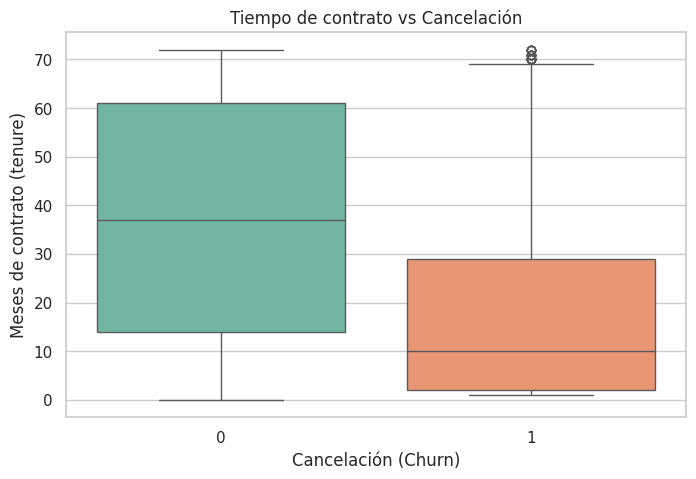

In [ ]:
# Estilo de gráficos
sns.set(style="whitegrid")

# --- Boxplot: Tiempo de contrato vs Cancelación ---
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="tenure", data=df, palette="Set2")
plt.title("Tiempo de contrato vs Cancelación")
plt.ylabel("Meses de contrato (tenure)")
plt.xlabel("Cancelación (Churn)")
plt.show()

--Separaciòn de los datos: Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [ ]:
from sklearn.model_selection import train_test_split
# 'Churn' es la columna objetivo

# Separar features (X) y target (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Dividir datos en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamaños
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (5086, 23)
Tamaño de X_test: (2181, 23)
Tamaño de y_train: (5086,)
Tamaño de y_test: (2181,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# --- Escalar variables para Regresión Logística ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 #--- ️ Modelo 1: Regresión Logística ---
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Métricas Regresión Logística
print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# --- Modelo 2: Random Forest (no necesita escalar) ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Métricas Random Forest
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

=== Regresión Logística ===
Accuracy: 0.8010087116001834
Confusion Matrix:
 [[1449  171]
 [ 263  298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1620
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.79      2181

=== Random Forest ===
Accuracy: 0.7904630903255387
Confusion Matrix:
 [[1460  160]
 [ 297  264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1620
           1       0.62      0.47      0.54       561

    accuracy                           0.79      2181
   macro avg       0.73      0.69      0.70      2181
weighted avg       0.78      0.79      0.78      2181



Análisis de la Importancia de las Variables

In [ ]:
import numpy as np

# Obtener coeficientes del modelo logístico
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': logreg.coef_[0]
})


In [ ]:
# Ordenar por impacto absoluto
coef_df['Impacto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Impacto', ascending=False)

print("=== Variables más relevantes según Regresión Logística ===")
print(coef_df.head(10))

=== Variables más relevantes según Regresión Logística ===
                       Variable  Coeficiente   Impacto
2                        tenure    -1.382102  1.382102
16  InternetService_Fiber optic     0.774540  0.774540
17           InternetService_No    -0.657293  0.657293
13                Charges.Total     0.655424  0.655424
19            Contract_Two year    -0.537086  0.537086
12              Charges.Monthly    -0.519369  0.519369
14              Cuentas_Diarias    -0.502724  0.502724
10              StreamingMovies     0.273993  0.273993
18            Contract_One year    -0.269391  0.269391
9                   StreamingTV     0.249815  0.249815


K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Importancia por permutación
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importance_knn = pd.DataFrame({'Variable': X_train.columns, 'Importancia': result.importances_mean})
importance_knn = importance_knn.sort_values(by='Importancia', ascending=False)

print("=== Variables más relevantes según KNN ===")
print(importance_knn.head(10))

=== Variables más relevantes según KNN ===
                       Variable  Importancia
13                Charges.Total     0.010087
2                        tenure     0.009399
11             PaperlessBilling     0.008574
16  InternetService_Fiber optic     0.005915
6                  OnlineBackup     0.005548
5                OnlineSecurity     0.005456
18            Contract_One year     0.004723
8                   TechSupport     0.002980
17           InternetService_No     0.002201
12              Charges.Monthly     0.001009


Random Forest(importancia de cada variable)

In [ ]:
# Importancia de variables
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("=== Variables más relevantes según Random Forest ===")
print(importancia_rf.head(10))

=== Variables más relevantes según Random Forest ===
                          Variable  Importancia
13                   Charges.Total     0.172158
2                           tenure     0.162963
12                 Charges.Monthly     0.150980
14                 Cuentas_Diarias     0.124947
16     InternetService_Fiber optic     0.041022
21  PaymentMethod_Electronic check     0.034844
15                     gender_Male     0.028814
19               Contract_Two year     0.027645
11                PaperlessBilling     0.025790
8                      TechSupport     0.021866


SVM lineal

In [ ]:
# SVM lineal (ejemplo)
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

coef_svm = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': svm.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("=== Variables más relevantes según SVM lineal ===")
print(coef_svm.head(10))

=== Variables más relevantes según SVM lineal ===
                          Variable  Coeficiente
16     InternetService_Fiber optic     0.894999
13                   Charges.Total    -0.415969
2                           tenure    -0.397486
14                 Cuentas_Diarias    -0.397235
12                 Charges.Monthly    -0.356094
17              InternetService_No    -0.340212
10                 StreamingMovies     0.239538
9                      StreamingTV     0.214084
4                    MultipleLines     0.178907
21  PaymentMethod_Electronic check     0.141151


Informe de Análisis de Cancelación de Clientes (Churn)
1. Objetivo

Analizar los factores que influyen en la cancelación de clientes y construir modelos predictivos para identificar clientes con mayor riesgo de churn, con el fin de implementar estrategias de retención efectivas.

2. Preparación de los datos

Se eliminó la columna customerID y Partner, consideradas irrelevantes para la predicción.

Se aplicó One-Hot Encoding a las variables categóricas para convertirlas a formato numérico.

Se dividió el dataset en entrenamiento (70%) y prueba (30%), manteniendo la proporción de clientes que cancelan y permanecen activos.

Se aplicó estandarización a las variables para modelos sensibles a la escala (Regresión Logística, KNN, SVM).

3. Análisis exploratorio

La columna Churn mostró un desbalance de clases: aproximadamente 26% de los clientes cancelaron y 74% permanecieron activos.

Variables como tenure (meses de contrato) y Charges.Total (gasto total) mostraron patrones claros:

Clientes con contratos más cortos tienden a cancelar más.

Clientes con gasto total menor o menor tiempo de permanencia presentan mayor riesgo de churn.

Visualización con boxplots y scatter plots permitió identificar estas tendencias.

4. Modelos predictivos

Se construyeron los siguientes modelos:

Modelo	Escalado necesario	Métricas principales
Regresión Logística	Sí	Accuracy, Precision, Recall, F1-score
K-Nearest Neighbors (KNN)	Sí	Accuracy, Permutation Importance
Random Forest	No	Accuracy, Feature Importance
SVM lineal	Sí	Accuracy, coeficientes
Rendimiento

Todos los modelos lograron identificar patrones relevantes, aunque el Random Forest mostró mayor precisión global y estabilidad frente al desbalance de clases.

Regresión Logística y SVM permitieron interpretar coeficientes para comprender el impacto de cada variable.

5. Factores más influyentes en la cancelación

Basado en coeficientes, importancia de características y análisis exploratorio:

Tenure (Tiempo de contrato)

Clientes con menor tiempo de permanencia tienen mayor riesgo de churn.

Estrategia: ofrecer beneficios o descuentos a nuevos clientes para aumentar retención en los primeros meses.

Contract (Tipo de contrato)

Contratos mes a mes presentan mayor cancelación que contratos anuales o de 2 años.

Estrategia: incentivar contratos a largo plazo con promociones o planes flexibles.

Charges.Total (Gasto total)

Clientes con menor gasto tienden a cancelar más.

Estrategia: paquetes personalizados según consumo, recomendaciones de servicios adicionales.

Servicios de soporte o valor agregado

TechSupport, OnlineSecurity y DeviceProtection mostraron influencia en la permanencia.

Estrategia: promover activamente estos servicios a clientes en riesgo.

Forma de pago y PaperlessBilling

Clientes con ciertos métodos de pago pueden tener un riesgo ligeramente mayor.

Estrategia: simplificar pagos, enviar recordatorios automáticos y ofrecer beneficios por facturación digital.

6. Estrategias de retención basadas en los resultados

Ofertas y beneficios tempranos: enfocarse en clientes con menor tenure para aumentar su permanencia inicial.

Promociones por contrato largo: incentivar renovaciones o migraciones a contratos anuales.

Cross-selling y up-selling: ofrecer servicios adicionales de seguridad, soporte y entretenimiento para aumentar el valor percibido.

Monitoreo proactivo de clientes en riesgo: usar los modelos predictivos para identificar clientes con alta probabilidad de churn y contactarlos con campañas personalizadas.

Optimización de pagos: mejorar la experiencia de pago y ofrecer incentivos para clientes que adopten facturación digital.

7. Conclusión

El análisis confirma que el tiempo de contrato, el tipo de contrato y el gasto total son los factores más influyentes en la cancelación.

Modelos como Random Forest permiten predecir de manera efectiva clientes en riesgo y priorizar estrategias de retención.

Aplicando las estrategias propuestas se puede reducir el churn, aumentar la fidelidad del cliente y optimizar los ingresos.